In [2]:
# imports
import pandas as pd
import seaborn as sns
import re
import numpy as np
import matplotlib.pyplot as plt

In [5]:
residual_phages_checkv = pd.read_csv('../data/phage_MAGs/quality_summary.tsv', sep = '\t')
residual_phages_checkv['component'] = ['_'.join(re.split('_', v)[:3]) for v in  residual_phages_checkv['contig_id']]
residual_phages_checkv_quality_filter = residual_phages_checkv[residual_phages_checkv['checkv_quality'].isin(['High-quality', 'Complete'])]
quality_filter_phages = residual_phages_checkv_quality_filter['contig_id'].to_list()

In [4]:
# using checkv get these phages that are predicted with high completeness 
residual_phages_checkv_quality_filter 

,contig_id,contig_length,provirus,proviral_length,gene_count,viral_genes,host_genes,checkv_quality,miuvig_quality,completeness,completeness_method,contamination,kmer_freq,warnings,component
1,phage_comp_6_cycle_9,64960,No,NaN,61,1,46,High-quality,High-quality,100.00,HMM-based (lower-bound),0.00,1.0,NaN,phage_comp_6
22,phage_comp_21_cycle_2,33224,No,NaN,37,20,3,High-quality,High-quality,100.00,AAI-based (high-confidence),0.00,1.0,NaN,phage_comp_21
23,phage_comp_21_cycle_1,33224,No,NaN,37,20,3,High-quality,High-quality,100.00,AAI-based (high-confidence),0.00,1.0,NaN,phage_comp_21
27,phage_comp_34_cycle_3,76087,No,NaN,67,0,48,High-quality,High-quality,100.00,AAI-based (medium-confidence),0.00,1.0,no viral genes detected; contig >1.5x longer t...,phage_comp_34
171,phage_comp_154_cycle_2,49630,Yes,38023.0,60,38,8,High-quality,High-quality,94.40,AAI-based (high-confidence),23.39,1.0,NaN,phage_comp_154
274,phage_comp_263_cycle_1,93355,No,NaN,86,2,69,High-quality,High-quality,100.00,HMM-based (lower-bound),0.00,1.0,NaN,phage_comp_263
325,phage_comp_337_cycle_1,34338,No,NaN,55,38,0,High-quality,High-quality,90.02,AAI-based (high-confidence),0.00,1.0,NaN,phage_comp_337
451,phage_comp_691_cycle_1,161828,Yes,38681.0,163,22,94,Complete,High-quality,100.00,Provirus (medium-confidence),76.10,1.0,contig >1.5x longer than expected genome length,phage_comp_691


In [5]:
residual_iphop = pd.read_csv('../data/phage_MAGs/Host_prediction_to_genus_m90.tsv', sep = '\t')

In [6]:
residual_iphop[residual_iphop['Virus'].isin(quality_filter_phages)]

,Virus,AAI to closest RaFAH reference,Host genus,Confidence score,List of methods
89,phage_comp_154_cycle_2,69.37,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,90.7,blast;93.10 iPHoP-RF;52.00
243,phage_comp_337_cycle_1,83.21,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,95.7,CRISPR;97.00 blast;78.60
244,phage_comp_337_cycle_1,83.21,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,94.6,blast;96.20 iPHoP-RF;84.20
270,phage_comp_34_cycle_3,22.67,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,91.1,blast;93.50 iPHoP-RF;69.50
467,phage_comp_6_cycle_9,7.34,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,91.1,blast;93.50 iPHoP-RF;69.80


In [7]:
for i in range(len(residual_iphop[residual_iphop['Virus'].isin(quality_filter_phages)])): 
    print(residual_iphop[residual_iphop['Virus'].isin(quality_filter_phages)].iloc[i]['Virus'])
    print(residual_iphop[residual_iphop['Virus'].isin(quality_filter_phages)].iloc[i]['Host genus'])
    print()

phage_comp_154_cycle_2
d__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Lelliottia

phage_comp_337_cycle_1
d__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella

phage_comp_337_cycle_1
d__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter

phage_comp_34_cycle_3
d__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__RHBSTW-00994

phage_comp_6_cycle_9
d__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Kluyvera



In [8]:
# based on the results here give the phages some putative names 

In [9]:
phage_names = {'phage_comp_6_cycle_9': 'phage_6_c9; Kluyvera',
 'phage_comp_21_cycle_2': 'phage_21_c2; unknown host',
 'phage_comp_21_cycle_1': 'phage_21_c1; unknown host',
 'phage_comp_34_cycle_3': 'phage_34_c3; RHBSTW-00994',
 'phage_comp_154_cycle_2': 'phage_154_c2; Lelliottia' ,
 'phage_comp_263_cycle_1': 'phage_263_c1; unknown host' ,
 'phage_comp_337_cycle_1': 'phage_337_c1; Enterobacter',
 'phage_comp_691_cycle_1': 'phage_691_c1; unknown host'}

In [10]:
# get the coverages of the phages 
koverage = pd.read_csv('../data/phage_MAGs/sample_coverage.tsv', sep = '\t')

# read in sample metadata 
metadata = pd.read_csv('../metadata/residual_community_metadata.csv') 
metadata['distance'] = (metadata['Order'] -1 ) *3 
metadata['distance']= ['Band' if m==84 else m for m in metadata['distance'] ]
order_dict = dict(zip(metadata['FAME ID (leave blank)'], metadata['Order']))
distance_dict = order_dict = dict(zip(metadata['FAME ID (leave blank)'], metadata['distance']))

koverage_matrix = koverage.pivot_table(
    index="Contig",
    columns="Sample",
    values="RPKM",
    fill_value=0
)

koverage_matrix.columns = [re.split('_', i)[0]  for i in koverage_matrix.columns.to_list()] 

# reorder the samples by the order that they occur in the tube 
koverage_matrix = koverage_matrix[metadata['FAME ID (leave blank)']]
koverage_matrix = koverage_matrix.loc[['phage_comp_21_cycle_1',    'phage_comp_337_cycle_1', 'phage_comp_154_cycle_2',    'phage_comp_691_cycle_1','phage_comp_263_cycle_1',
     'phage_comp_34_cycle_3',
     'phage_comp_6_cycle_9']]
koverage_matrix.index = [phage_names.get(n) for n in koverage_matrix.index] 
koverage_matrix.columns = [distance_dict.get(k) for k in koverage_matrix.columns]                                      

# make a stacked version for making a line plot
koverage_stacked = koverage_matrix.stack().reset_index()
koverage_stacked['Order'] = [order_dict.get(k) for k in koverage_stacked['level_1']]

In [11]:
koverage_matrix

,0,3,6,9,12,15,18,21,24,27,...,57,60,63,66,69,72,75,78,81,Band
phage_21_c1; unknown host,512.1,530.4,398.9,561.7,1716.0,1156.0,755.8,409.6,234.0,170.2,...,234.3,236.9,202.4,174.5,173.3,175.5,168.80,198.40,228.90,283.600
phage_337_c1; Enterobacter,936.3,1057.0,908.2,346.9,146.7,312.3,326.2,524.3,1033.0,678.1,...,103.0,107.6,120.6,122.4,127.9,136.9,85.26,62.45,16.33,2.971
phage_154_c2; Lelliottia,1438.0,1281.0,1474.0,4002.0,1872.0,1506.0,1544.0,1338.0,1093.0,898.3,...,1427.0,1437.0,1354.0,1387.0,1304.0,1313.0,1321.00,1220.00,1393.00,1607.000
phage_691_c1; unknown host,1124.0,1147.0,1047.0,795.9,699.9,728.0,690.6,661.5,621.7,1952.0,...,1052.0,1157.0,1107.0,1154.0,1153.0,1166.0,1164.00,1134.00,821.40,569.200
phage_263_c1; unknown host,2460.0,2502.0,2497.0,2078.0,1775.0,1852.0,1814.0,1787.0,1742.0,3234.0,...,2512.0,2492.0,2615.0,2632.0,2698.0,2706.0,2800.00,3018.00,2764.00,2209.000
phage_34_c3; RHBSTW-00994,1182.0,1087.0,1179.0,2070.0,2714.0,3710.0,3824.0,5461.0,6159.0,1950.0,...,3248.0,3109.0,3233.0,3161.0,3180.0,3191.0,3005.00,2842.00,2827.00,3066.000
phage_6_c9; Kluyvera,5609.0,5676.0,5781.0,4165.0,4603.0,4034.0,4406.0,3061.0,2518.0,2362.0,...,3935.0,3842.0,3724.0,3676.0,3616.0,3549.0,3663.00,3687.00,4757.00,5733.000


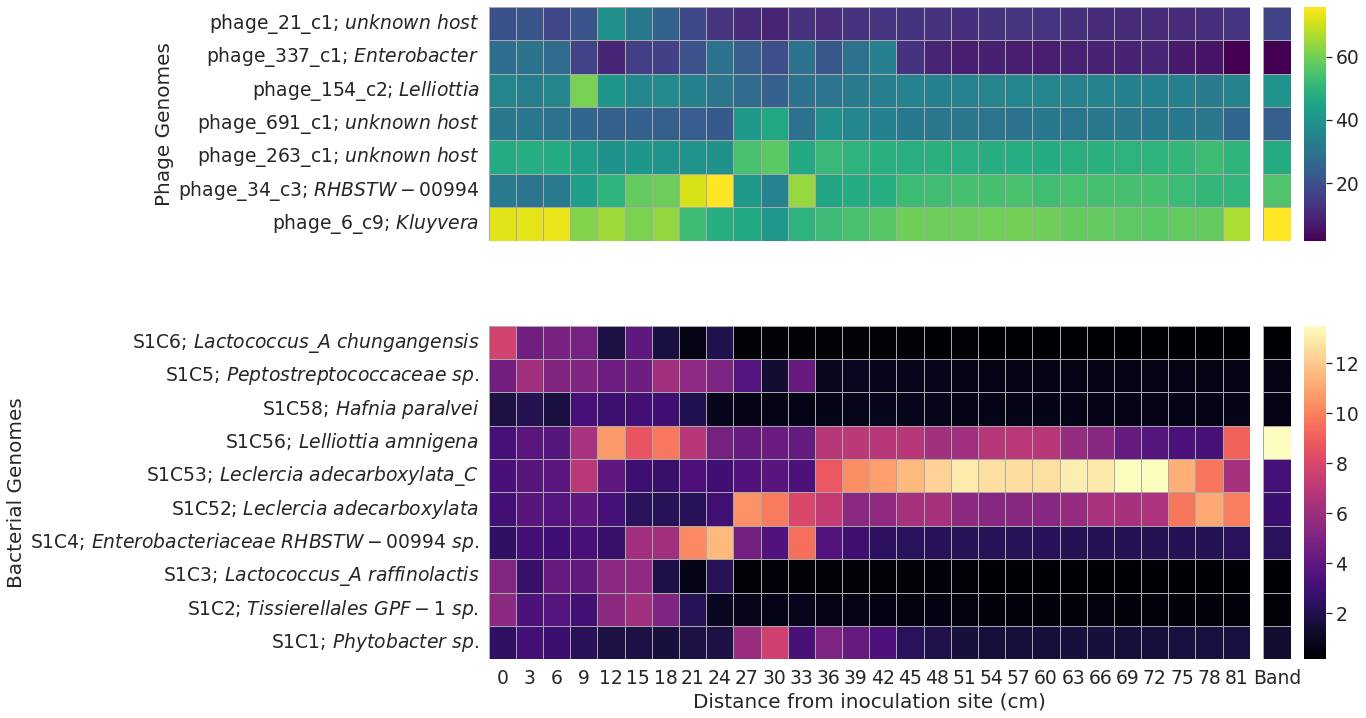

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(font_scale=1.7)

# Read the bacterial MAG data
bacteria_mag = pd.read_csv('../data/MAGs/MAG_abundance_residual.csv', index_col='label')

# Prepare viral data
viral_data = np.sqrt(koverage_matrix)
viral_main = np.sqrt(koverage_matrix.iloc[:, :-1])
viral_last = np.sqrt(koverage_matrix.iloc[:, -1:])

# Prepare bacterial data
bacteria_data = np.sqrt(bacteria_mag)
bacteria_main = np.sqrt(bacteria_mag.iloc[:, :-1])
bacteria_last = np.sqrt(bacteria_mag.iloc[:, -1:])
bacteria_last.columns = [['Band']]

# Calculate height ratios based on number of rows
height_ratio = [viral_main.shape[0], bacteria_main.shape[0]]

# Create figure - increased colorbar width
fig = plt.figure(figsize=(15, 12))
gs = fig.add_gridspec(2, 3, height_ratios=height_ratio, 
                      width_ratios=[viral_main.shape[1], 1, 0.8],
                      hspace=0.3, wspace=0.05)

# Top row - Viral heatmaps
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
cax1 = fig.add_subplot(gs[0, 2])

# update the columns names 
viral_main.columns = [distance_dict.get(k) for k in viral_main.columns]  
bacteria_main.columns = [distance_dict.get(k) for k in bacteria_main.columns]  

sns.heatmap(viral_main, ax=ax1, cbar=False, 
            linewidths=0.5, linecolor='darkgrey',
            cmap='viridis', xticklabels=False)
sns.heatmap(viral_last, ax=ax2, cbar=True, yticklabels=False,
            linewidths=0.5, linecolor='darkgrey',
            cmap='viridis', xticklabels=False,
            cbar_ax=cax1)

# Italicize text after semicolon for viral labels
viral_labels = ax1.get_yticklabels()
new_viral_labels = []
for label in viral_labels:
    text = label.get_text()
    if ';' in text:
        parts = text.split(';', 1)
        # Escape underscores and spaces in the italic part
        italic_part = parts[1].strip().replace('_', r'\_').replace(' ', r'\ ')
        new_viral_labels.append(f"{parts[0]}; $\it{{{italic_part}}}$")
    else:
        new_viral_labels.append(text)
ax1.set_yticklabels(new_viral_labels)

ax2.set_ylabel('')
ax1.set_ylabel('Phage Genomes', fontsize=20)

# Bottom row - Bacterial heatmaps
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
cax2 = fig.add_subplot(gs[1, 2])

sns.heatmap(bacteria_main, ax=ax3, cbar=False, 
            linewidths=0.5, linecolor='darkgrey',
            cmap='magma')
sns.heatmap(bacteria_last, ax=ax4, cbar=True, yticklabels=False,
            linewidths=0.5, linecolor='darkgrey',
            cmap='magma',
            cbar_ax=cax2)

# Italicize text after semicolon for bacterial labels
bacteria_labels = ax3.get_yticklabels()
new_bacteria_labels = []
for label in bacteria_labels:
    text = label.get_text()
    if ';' in text:
        parts = text.split(';', 1)
        # Escape underscores and spaces in the italic part
        italic_part = parts[1].strip().replace('_', r'\_').replace(' ', r'\ ')
        new_bacteria_labels.append(f"{parts[0]}; $\it{{{italic_part}}}$")
    else:
        new_bacteria_labels.append(text)
ax3.set_yticklabels(new_bacteria_labels)

ax4.set_ylabel('')
ax3.set_ylabel('Bacterial Genomes', fontsize=20)
ax3.set_xlabel('Distance from inoculation site (cm)', fontsize=20)
ax4.set_xlabel('')
plt.savefig('../figures/bacteria_phage_MAGs.png', dpi=300, bbox_inches='tight')
plt.show()

# compare abundance patterns of key mags 

Pearson correlation: r=0.609, p=0.0006
Spearman correlation: ρ=-0.004, p=0.9846


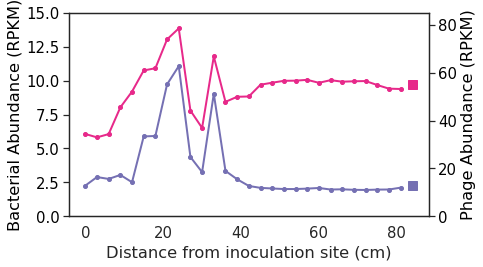

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

sns.set(style='white', font_scale=1.35)

# Align column names
bacteria_data.columns = viral_data.columns

# Extract the data series, excluding the 'Band' column
bacteria_series = bacteria_data.loc['S1C4; Enterobacteriaceae RHBSTW-00994 sp.'].drop('Band')
viral_series = viral_data.loc['phage_34_c3; RHBSTW-00994'].drop('Band')

# Extract the Band values separately
bacteria_band = bacteria_data.loc['S1C4; Enterobacteriaceae RHBSTW-00994 sp.', 'Band']
viral_band = viral_data.loc['phage_34_c3; RHBSTW-00994', 'Band']

# Compute correlations (excluding Band values)
pearson_corr, pearson_p = pearsonr(bacteria_series.values, viral_series.values)
spearman_corr, spearman_p = spearmanr(bacteria_series.values, viral_series.values)

print(f"Pearson correlation: r={pearson_corr:.3f}, p={pearson_p:.4f}")
print(f"Spearman correlation: ρ={spearman_corr:.3f}, p={spearman_p:.4f}")

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(7, 4))

# Plot bacteria data on left y-axis
color1 = '#7570b3'
ax1.set_xlabel('Distance from inoculation site (cm)')
ax1.set_ylabel('Bacterial Abundance (RPKM)', color='black')
ax1.plot(bacteria_series.index, bacteria_series.values, color=color1, label='Bacteria', marker='o', markersize=4, linewidth=2)
# Plot Band point separately at x=84 (not connected to the line)
ax1.plot(84, bacteria_band, color=color1, marker='s', markersize=9, linestyle='none')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim((0,15))

# Create secondary y-axis
ax2 = ax1.twinx()
color2 = '#e7298a'
ax2.set_ylabel('Phage Abundance (RPKM)', color='black')
ax2.plot(viral_series.index, viral_series.values, color=color2, label='Phage', marker='o', markersize=4, linewidth=2)
# Plot Band point separately at x=84 (not connected to the line)
ax2.plot(84, viral_band, color=color2, marker='s', markersize=9, linestyle='none')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim((0,85))

# Add title and adjust layout
fig.tight_layout()
plt.savefig('../figures/abundance_RHBSTW-0099.png', dpi=300, bbox_inches='tight')
plt.show()

Pearson correlation: r=0.305, p=0.1141
Spearman correlation: ρ=0.398, p=0.0357


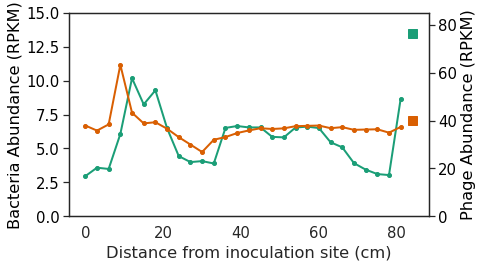

In [37]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Align column names
bacteria_data.columns = viral_data.columns

# Extract the data series, excluding the 'Band' column
bacteria_series = bacteria_data.loc['S1C56; Lelliottia amnigena'].drop('Band')
viral_series = viral_data.loc['phage_154_c2; Lelliottia'].drop('Band')

# Extract the Band values separately
bacteria_band = bacteria_data.loc['S1C56; Lelliottia amnigena', 'Band']
viral_band = viral_data.loc['phage_154_c2; Lelliottia', 'Band']

# Compute correlations (excluding Band values)
pearson_corr, pearson_p = pearsonr(bacteria_series.values, viral_series.values)
spearman_corr, spearman_p = spearmanr(bacteria_series.values, viral_series.values)

print(f"Pearson correlation: r={pearson_corr:.3f}, p={pearson_p:.4f}")
print(f"Spearman correlation: ρ={spearman_corr:.3f}, p={spearman_p:.4f}")

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(7, 4))

# Plot bacteria data on left y-axis
color1 = '#1b9e77'
ax1.set_xlabel('Distance from inoculation site (cm)')
ax1.set_ylabel('Bacteria Abundance (RPKM)', color='black')
ax1.plot(bacteria_series.index, bacteria_series.values, color=color1, label='Bacteria', marker='o', markersize=4, linewidth=2)
# Plot Band point separately at x=84 (not connected to the line)
ax1.plot(84, bacteria_band, color=color1, marker='s', markersize=9, linestyle='none')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim((0,15))

# Create secondary y-axis
ax2 = ax1.twinx()
color2 = '#d95f02'
ax2.set_ylabel('Phage Abundance (RPKM)', color='black')
ax2.plot(viral_series.index, viral_series.values, color=color2, label='Phage', marker='o', markersize=4, linewidth=2)
# Plot Band point separately at x=84 (not connected to the line)
ax2.plot(84, viral_band, color=color2, marker='s', markersize=9, linestyle='none')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim((0,85))

# Add title and adjust layout
fig.tight_layout()
plt.savefig('../figures/abundance_Lelliottia.png', dpi=300, bbox_inches='tight')
plt.show()